In [3]:
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [4]:
df=pd.read_csv('amazon_baby.csv')

In [ ]:
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


Find any missing review are present or not, If present remove those data.

In [6]:
df.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.review=df.review.str.lower()

In [13]:
df.review

0         these flannel wipes are ok, but in my opinion ...
1         it came early and was not disappointed. i love...
2         very soft and comfortable and warmer than it l...
3         this is a product well worth the purchase.  i ...
4         all of my kids have cried non-stop when i trie...
                                ...                        
183526    such a great idea! very handy to have and look...
183527    this product rocks!  it is a great blend of fu...
183528    this item looks great and cool for my kids.......
183529    i am extremely happy with this product. i have...
183530    i love this product very mush . i have bought ...
Name: review, Length: 182384, dtype: object

#Text Preprocessing

In [14]:
!pip install contractions

  Using cached contractions-0.1.73-py2.py3-none-any.whl (8.7 kB)
  Using cached textsearch-0.0.24-py2.py3-none-any.whl (7.6 kB)
  Using cached anyascii-0.3.2-py3-none-any.whl (289 kB)
  Using cached pyahocorasick-2.0.0.tar.gz (99 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pyahocorasick


  error: subprocess-exited-with-error
  
  × Building wheel for pyahocorasick (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'ahocorasick' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyahocorasick
ERROR: Could not build wheels for pyahocorasick, which is required to install pyproject.toml-based projects


In [12]:
#Expanding Contractions
import contractions
text = '''I'll be there within 5 min. Shouldn't you be there too?
          I'd love to see u there my dear. It's awesome to meet new friends.
          We've been waiting for this day for so long.'''
text=text.lower()

expanded_text=contractions.fix(text)
print('Original text: ' + text)
print('Expanded_text: ' + expanded_text)
translator=str.maketrans('', '', string.punctuation)
clean_text=expanded_text.translate(translator)
print('Clean_text:'+ clean_text)


ModuleNotFoundError: No module named 'contractions'

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hrith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hrith\AppData\Roaming\nltk_data...


KeyboardInterrupt: 

In [ ]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
tokens=clean_text.split()
print(tokens)
filtered_tokens = [w for w in tokens if not w in stop_words]
print(filtered_tokens)

from gensim.parsing.preprocessing import remove_stopwords
filtered_text=remove_stopwords(clean_text)
print(filtered_text)

['i', 'will', 'be', 'there', 'within', '5', 'min', 'should', 'not', 'you', 'be', 'there', 'too', 'i', 'would', 'love', 'to', 'see', 'you', 'there', 'my', 'dear', 'it', 'is', 'awesome', 'to', 'meet', 'new', 'friends', 'we', 'have', 'been', 'waiting', 'for', 'this', 'day', 'for', 'so', 'long']
['within', '5', 'min', 'would', 'love', 'see', 'dear', 'awesome', 'meet', 'new', 'friends', 'waiting', 'day', 'long']
5 min love dear awesome meet new friends waiting day long


In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed=[]
for i in filtered_tokens:
  stemmed.append(ps.stem(i))
print(stemmed)



from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

lemma=[]
for i in filtered_tokens:
  lemma.append(wnl.lemmatize(i,pos='v'))
print(lemma)

['within', '5', 'min', 'would', 'love', 'see', 'dear', 'awesom', 'meet', 'new', 'friend', 'wait', 'day', 'long']
['within', '5', 'min', 'would', 'love', 'see', 'dear', 'awesome', 'meet', 'new', 'friends', 'wait', 'day', 'long']


In [ ]:
translator=str.maketrans('', '', string.punctuation)
df.review=df.review.str.translate(translator)

In [ ]:
df.review

0         these flannel wipes are ok but in my opinion n...
1         it came early and was not disappointed i love ...
2         very soft and comfortable and warmer than it l...
3         this is a product well worth the purchase  i h...
4         all of my kids have cried nonstop when i tried...
                                ...                        
183526    such a great idea very handy to have and look ...
183527    this product rocks  it is a great blend of fun...
183528    this item looks great and cool for my kidsi kn...
183529    i am extremely happy with this product i have ...
183530    i love this product very mush  i have bought m...
Name: review, Length: 182384, dtype: object

#Sentiment Analysis


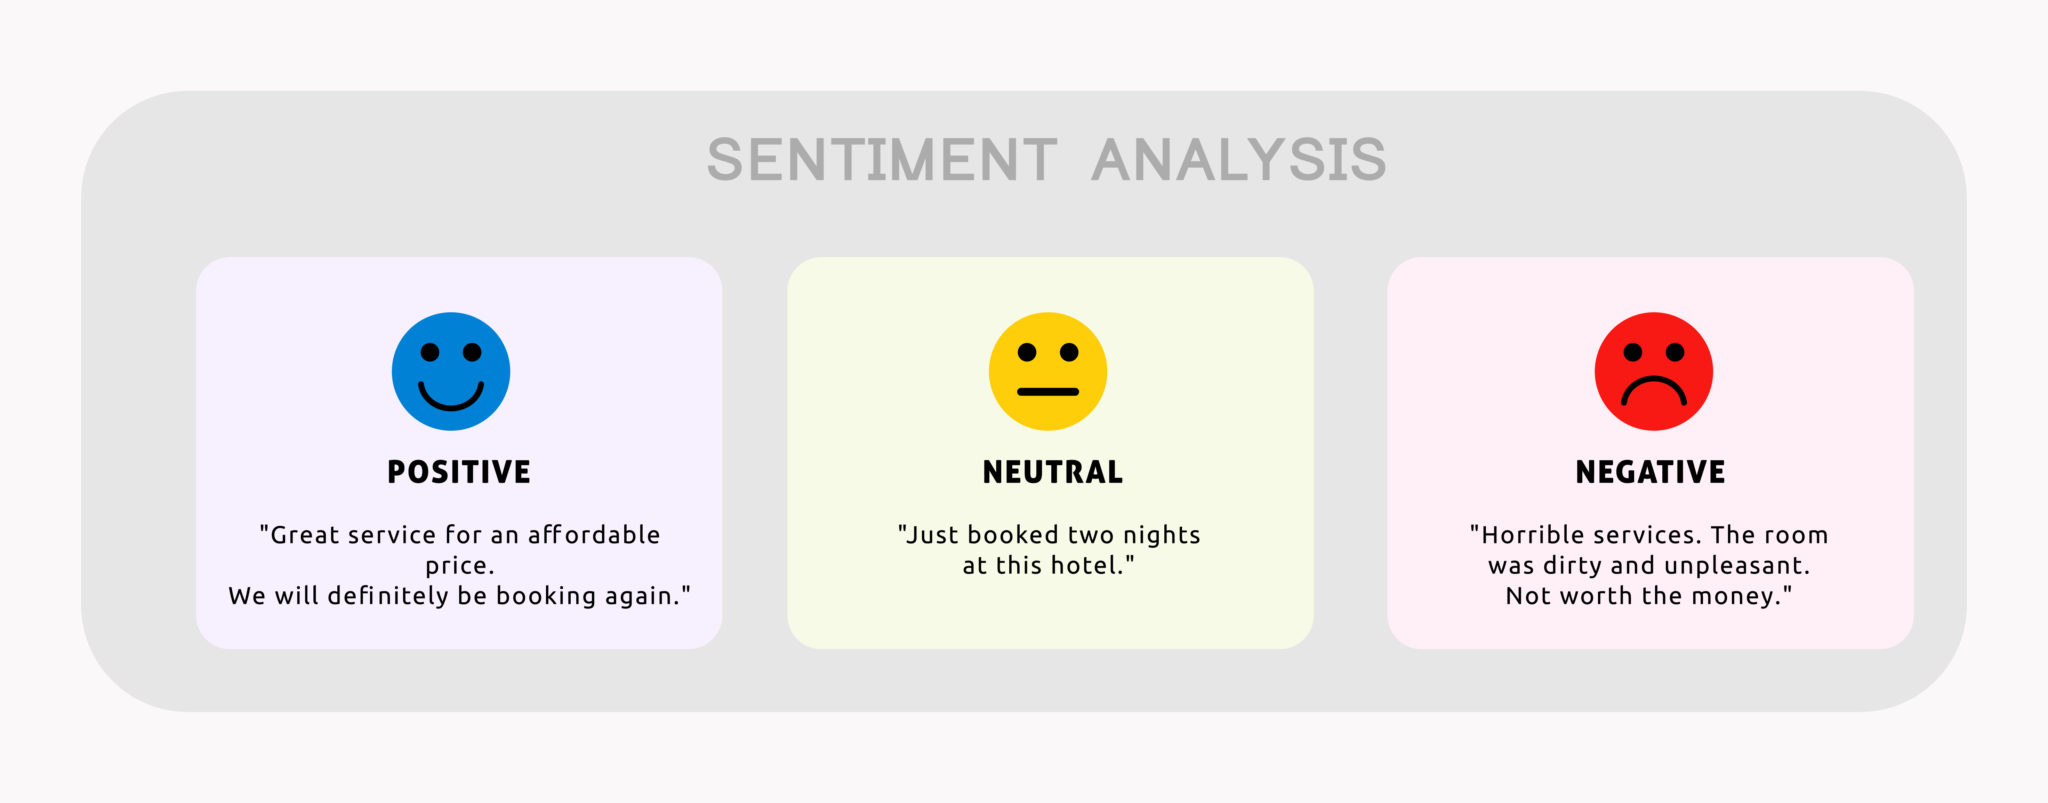

A Polarity score is assigned based on the sentiment of the text

In [ ]:
from textblob import TextBlob

In [ ]:
t=TextBlob('This cake was not very good')
t.sentiment.polarity

-0.26923076923076916

In [ ]:
l=[]
for i in df.review:
    processed=TextBlob(i)
    l.append(processed.sentiment.polarity)

In [ ]:
df['polarity']=l

In [ ]:
df

,name,review,rating,polarity
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,0.083333
1,Planetwise Wipe Pouch,it came early and was not disappointed i love ...,5,0.367000
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,0.293333
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i h...,5,0.318767
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,0.577778
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea very handy to have and look ...,5,0.546000
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks it is a great blend of fun...,5,0.440625
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kidsi kn...,5,0.650000
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product i have ...,5,0.379694


9. List the Top 20 products based on the polarity

In [ ]:
df.sort_values(by='polarity',ascending=False).name[:20]

125611    Dr. Brown\'s 2 Pack Natural Flow Y-Cut Standar...
150679             Britax 2 Pack EZ-Cling Sun Shades, Black
96292            Dream On Me 3&quot; Portable Crib Mattress
25143                       Philips AVENT Thermal Tote Navy
45809          Sunshine Kids Stroller Accessory Buggy Buddy
131535    Motorola MBP33 Wireless Video Baby Monitor wit...
68875     Starting Small Monkey Novelty Hamper in Brown,...
45797          Sunshine Kids Stroller Accessory Buggy Buddy
174139          Valco Baby Zee Two Car Seat Adapter (Graco)
113255    Luvable Friends Flannel Receiving Blankets, Pi...
149234    HALO SleepSack 5-Piece Bumper-Free Crib Set, C...
15862     Fisher-Price Infant-To-Toddler Rocker, Blue/Green
141844    The Rockabye Glider Square Back Glider, Chenil...
68937                Joovy Room&sup2; Portable Playard, Red
56183                     Prince Lionheart bebePOD Tray Kit
25059              Prince Lionheart On-the-Go Bottle Warmer
4131                        The First Ye

In [ ]:
TextBlob("terrorism is okay but i love it").sentiment.polarity

0.5